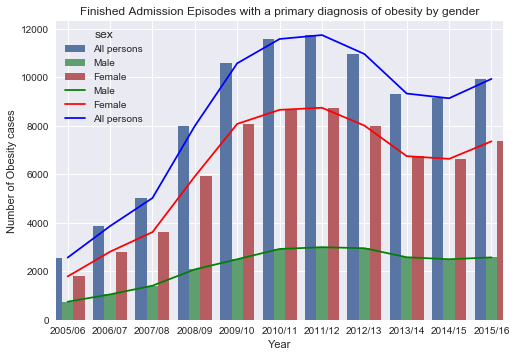

The trend suggest that the number of male obesity cases seem to
observe an approximately constant trend
while the obesity cases among the female cases saw a non-monotonic behaviour.
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
FITTING PROECDURE
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


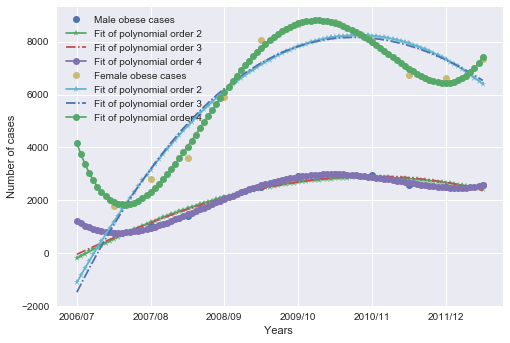

In [1]:
import matplotlib.pyplot as plt
import types
import numpy as np
import sklearn
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from scipy.stats import norm
from __future__ import division
## split_size
split_size=0.3

### Author C. Joshi
### The dataset has been obtained from
##https://data.gov.uk/dataset/statistics_on_obesity_physical_activity_and_diet_england

### What this dataset is about ?
#### This statistical report presents a range of information on obesity, physical activity 
#and diet, drawn together from a variety of sources.

#The topics covered include:

#Overweight and obesity prevalence among adults and children

#Physical activity levels among adults and children

#Trends in purchases and consumption of food and drink and energy intake

#Health outcomes of being overweight or obese.

#The annual compendium report presents new analyses by NHS Digital which 
#consists of statistics on the number of NHS hospital admissions attributable
#to obesity, the number of NHS hospital admissions attributable to a procedure 
#of 'Bariatric Surgery', and the number of prescription items provided in primary
#care for the treatment of obesity. The report focuses on England. 
#The latest available hospital admissions data is for 2015/16. The latest available 
#prescribing data is for 2016.


### STEP ONE :READING THE DATASET 
space=100
workbook=pd.ExcelFile('obes-phys-acti-diet-eng-2017-tab.xlsx')
list_sheets=workbook.sheet_names
df1 = pd.read_excel('obes-phys-acti-diet-eng-2017-tab.xlsx',\
sheetname=list_sheets[1])
df1_clean=df1[df1['Unnamed: 2'].apply(lambda x: type(x)==int)]
df1_clean=df1_clean.dropna(axis=1, how='all')
df1_clean.index=np.arange(np.shape(df1_clean)[0])
df1_clean.columns=['Year','All persons','Male','Female']
#df1_clean.index=df1_clean['Year']
#del df1_clean['Year']
#print df1_clean
df1_clean_rs = pd.melt(df1_clean.loc[:,['Year','All persons','Male','Female']], id_vars="Year", var_name="sex", \
                    value_name="Number of Obesity cases")
#print df1_clean
fig, ax = plt.subplots()
sns.set()
sns.barplot(x='Year', y='Number of Obesity cases', hue='sex', data=df1_clean_rs)
df1_clean.plot(x='Year',y='Male',color='green',ax=ax)
df1_clean.plot(x='Year',y='Female',color='red',ax=ax)
df1_clean.plot(x='Year',y='All persons',color='blue',ax=ax)
plt.xlabel("Year")
plt.ylabel("Number of Obesity cases")
plt.title("Finished Admission Episodes with a primary diagnosis of obesity by gender")
plt.show()
print "The trend suggest that the number of male obesity cases seem to"
print "observe an approximately constant trend"
print "while the obesity cases among the female cases \
saw a non-monotonic behaviour."
print "+"*space
print "FITTING PROECDURE"
print "+"*space



df1_clean['dummy_year']=1+np.arange(len(df1_clean['Year']))
grpedyear=zip(df1_clean['dummy_year'].tolist(),df1_clean['Year'].tolist())
X_train,X_test,y_train,y_test = train_test_split(df1_clean.loc[:,['dummy_year','Year']],\
df1_clean['Male'][:,np.newaxis],test_size=split_size)





fet_lst=['Male','Female']
poly_ord=[2,3,4]
pntsmax=100
strdata=[]
strpolydata=[]
streqn=[]
for out_indx in range(len(fet_lst)):
    for in_indx in range(len(poly_ord)):
        x = np.array(df1_clean['dummy_year'])
        strx=list(x)
        data=np.array(df1_clean[fet_lst[out_indx]])
        strdata.append(list(data))
        poly_params = np.polyfit(x, data, poly_ord[in_indx]) # Fit the data with a nth degree polynomial
        poly_ft = np.poly1d(poly_params)      # Construct the polynomial
        streqn.append(list(poly_ft.c))
        xPoly = np.linspace(0, max(x), pntsmax)  # Generate 100 x-coordinates from 0 to max(x)
        strpolyx=list(xPoly)
        strpolydata.append(list(poly_ft(xPoly)))  # Use the polynomial to calculate the y-coordinates
#strx=np.reshape(strx,(len(fet_lst)*len(poly_ord),len(df1_clean['dummy_year'])))
strdata=np.reshape(strdata,(len(fet_lst)*len(poly_ord),len(df1_clean['dummy_year'])))
#strpolyx=np.reshape(strpolyx,(len(fet_lst)*len(poly_ord),len(xPoly)))
strpolydata=np.reshape(strpolydata,(len(fet_lst)*len(poly_ord),len(xPoly)))
streqn=np.reshape(streqn, (len(fet_lst),len(poly_ord)))



f, ax = plt.subplots(1, 1)
sns.set()
fet=0
ax.plot(strx, strdata[fet,:], 'o',label=str(fet_lst[0])+" obese cases")
ax.plot(strpolyx, strpolydata[fet,:], '-*',label="Fit of polynomial order "+str(poly_ord[fet]))
ax.plot(strpolyx, strpolydata[fet+1,:], '-.',label="Fit of polynomial order "+str(poly_ord[fet+1]))
ax.plot(strpolyx, strpolydata[fet+2,:], '-o',label="Fit of polynomial order "+str(poly_ord[fet+2]))

fet=len(poly_ord)
ax.plot(strx, strdata[fet,:], 'o',label=str(fet_lst[1])+" obese cases")
ax.plot(strpolyx, strpolydata[fet,:], '-*',label="Fit of polynomial order "+str(poly_ord[fet-fet]))
ax.plot(strpolyx, strpolydata[fet+1,:], '-.',label="Fit of polynomial order "+str(poly_ord[fet+1-fet]))
ax.plot(strpolyx, strpolydata[fet+2,:], '-o',label="Fit of polynomial order "+str(poly_ord[fet+2-fet]))
ax.set_xticklabels(df1_clean.Year)
plt.xlabel("Years ")
plt.ylabel("Number of cases")             
#ax.set_title(title)
ax.legend()
plt.show()
